In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
import math
import keras
import time
%matplotlib inline

In [3]:
alphabet = list(string.ascii_lowercase)
df = pd.read_csv('wine.data.csv', sep=' ', names=alphabet[:15])
df.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,1,1,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015
1,1,1,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770
2,1,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
3,1,1,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
4,1,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885


In [4]:
training_data = df[df.a==1]
testing_data = df[df.a==2]
X = df[df.columns[2:14]]
Y = df[df.columns[1]]
X_train = preprocessing.normalize(np.array(training_data[training_data.columns[2:15]]), axis=0) #bien choisir ses features
X_test = preprocessing.normalize(np.array(testing_data[testing_data.columns[2:15]]), axis=0)
y_train = np.array(training_data[training_data.columns[1]] )
y_test = np.array(testing_data[testing_data.columns[1]])
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((118, 13), (118,), (60, 13), (60,))


## Q1 : k-NN and metrics

In [5]:
def euclideanDistance(a, b): #good results
    dist = 0
    for x in range(len(a)):
        dist += (a[x]-b[x])**2
    return math.sqrt(dist)

def crossCorrelation(a, b):
    dist = 0
    for x in range(len(a)):
        dist += a[x]*b[x]
    return dist

def KullLeibDiv(a, b):
    dist = 0
    for x in range(len(a)):
        dist += a[x]*np.log(a[x]/b[x])
    return dist

def JenShan(a, b): #good results
    M = [(x+y)/2 for x,y in zip(a,b)]
    dist1 = KullLeibDiv(a,M)
    dist2 = KullLeibDiv(b,M)
    dist = dist1 + dist2
    return dist
        
def chiSquare(a, b): #good results
    dist = 0
    for x in range(len(a)):
        dist += 0.5*((a[x]-b[x])**2)/(a[x]+b[x])
    return dist

def Mahala(a, b): #good results
    dist = 0
    covariance = cov(a)
    diff = [x-y for x,y in zip(a,b)]
    print(covariance)
    inv = np.linalg.inv(covariance)
    dist = np.dot(np.transpose(diff), inv)
    dist = np.dot(dist, diff)
    return dist

def cov(x):
    L = len(x)
    cov = np.zeros((L,L))
    for i in range(L):
        for j in range(L):
            print(np.cov(x[i], x[j]))
            cov[i][j] = np.cov(x[i], x[j])
    return cov

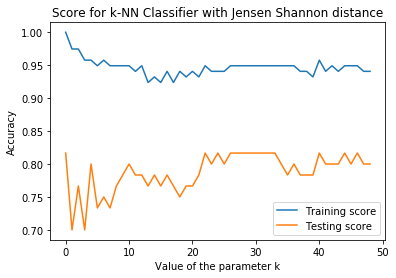

In [6]:
import operator
from collections import Counter

def getNeighbors(X_train, y_train, testInstance, k, metric):
    distances = []
    labels = []
    for x in range(len(X_train)):
        dist = metric(testInstance, X_train[x])
        distances.append(dist)
        labels.append(y_train[x])
    #distances.sort(key=lambda tup: tup[1])
    distances, labels = (list(t) for t in zip(*sorted(zip(distances, labels))))
    neighbors = []
    for x in range(k):
        neighbors.append(labels[x])  
    return neighbors
 
#Input : [y[0], y[1], ...] list of labels
def getResponse(neighbors):
    most_common,num_most_common = Counter(neighbors).most_common(1)[0]
    return most_common
 
def main(metric, k):
    
    # generate predictions
    predictions=[]
    y_pred_train=[]
    for x in range(len(X_test)):
        neighbors = getNeighbors(X_train, y_train, X_test[x], k, metric)
        result = getResponse(neighbors)
        predictions.append(result)
    
    for x in range(len(X_train)):
        neighbors2 = getNeighbors(X_train, y_train, X_train[x], k, metric)
        result2 = getResponse(neighbors2)
        y_pred_train.append(result2)
    #print'Training score for kNN Classifier : ', accuracy_score(y_pred_train, y_train)        
    #print'Testing score for kNN Classifier : ', accuracy_score(predictions, y_test)
    return accuracy_score(y_pred_train, y_train), accuracy_score(predictions, y_test)

training_score = []
testing_score = []
for k in range(1,50):
    score1, score2 = main(JenShan, k)
    training_score.append(score1)
    testing_score.append(score2)
plt.plot(training_score, label='Training score')
plt.plot(testing_score, label='Testing score')
plt.legend()
plt.xlabel('Value of the parameter k')
plt.ylabel('Accuracy')
plt.title('Score for k-NN Classifier with Jensen Shannon distance')
plt.savefig('kNN_JS.png')
plt.show()

k =  1
Training score for kNN Classifier :  1.0
Testing score for kNN Classifier :  0.783333333333
k =  2
Training score for kNN Classifier :  0.974576271186
Testing score for kNN Classifier :  0.716666666667
k =  3
Training score for kNN Classifier :  0.983050847458
Testing score for kNN Classifier :  0.816666666667
k =  4
Training score for kNN Classifier :  0.966101694915
Testing score for kNN Classifier :  0.716666666667
k =  5
Training score for kNN Classifier :  0.974576271186
Testing score for kNN Classifier :  0.85
k =  6
Training score for kNN Classifier :  0.949152542373
Testing score for kNN Classifier :  0.766666666667
k =  7
Training score for kNN Classifier :  0.974576271186
Testing score for kNN Classifier :  0.8
k =  8
Training score for kNN Classifier :  0.966101694915
Testing score for kNN Classifier :  0.75
k =  9
Training score for kNN Classifier :  0.974576271186
Testing score for kNN Classifier :  0.8
k =  10
Training score for kNN Classifier :  0.957627118644
Tes

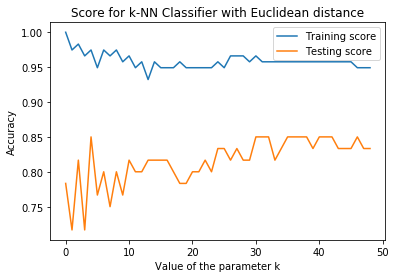

Time in 0.459808s


In [7]:
start = time.time()
training_score = []
testing_score = []
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
cov_training = np.cov(np.transpose(X_train))
for k in range(1,50):
    print'k = ',k
    knn = KNeighborsClassifier(n_neighbors=k, metric=metrics[0])#metric='mahalanobis', metric_params={'V': cov_training})
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    print'Training score for kNN Classifier : ', accuracy_score(y_pred_train, y_train)
    print'Testing score for kNN Classifier : ', accuracy_score(y_pred_test, y_test)
    training_score.append(accuracy_score(y_pred_train, y_train))
    testing_score.append(accuracy_score(y_pred_test, y_test))
plt.figure()
plt.plot(training_score, label='Training score')
plt.plot(testing_score, label='Testing score')
plt.legend()
plt.xlabel('Value of the parameter k')
plt.ylabel('Accuracy')
plt.title('Score for k-NN Classifier with Euclidean distance')
plt.savefig('kNN_eucli.png')
plt.show()
print'Time in %fs' % (time.time() - start)

## Q2 : k-means clustering

In [9]:
start = time.time()
training_score = []
testing_score = []
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=1000)
kmeans.fit(X_train, y_train)
y_pred_train = kmeans.predict(X_train)
y_pred_test = kmeans.predict(X_test)
print'Training score for k-means : ', accuracy_score(y_pred_train, y_train)
print'Testing score for k-means : ', accuracy_score(y_pred_test, y_test)
training_score.append(accuracy_score(y_pred_train, y_train))
testing_score.append(accuracy_score(y_pred_test, y_test))
print'Time in %fs' % (time.time() - start)

Training score for k-means :  0.0762711864407
Testing score for k-means :  0.183333333333
Time in 0.027675s


## Q3 : Neural Network 

In [10]:
start = time.time()
training_score = []
testing_score = []
solver = ['lbfgs', 'sgd', 'adam']
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred_train = kmeans.predict(X_train)
y_pred_test = kmeans.predict(X_test)
print'Training score for MLP Classifier : ', accuracy_score(y_pred_train, y_train)
print'Testing score for MLP Classifier : ', accuracy_score(y_pred_test, y_test)
training_score.append(accuracy_score(y_pred_train, y_train))
testing_score.append(accuracy_score(y_pred_test, y_test))
print'Time in %fs' % (time.time() - start)

Training score for MLP Classifier :  0.0762711864407
Testing score for MLP Classifier :  0.183333333333
Time in 0.143006s


/usr/local/lib/python2.7/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
#https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network 
y_dummies = pd.get_dummies(Y)
y_dummies2 = pd.get_dummies(y_train)

Epoch 1/1
118/118 [==============================] - 0s 287us/step

acc: 43.22%
Testing score for Neural Network :  0.35
Epoch 1/6
118/118 [==============================] - 0s 851us/step - loss: 1.1019 - acc: 0.3051
Epoch 2/6
118/118 [==============================] - 0s 259us/step - loss: 1.0827 - acc: 0.3814
Epoch 3/6
118/118 [==============================] - 0s 238us/step - loss: 1.0739 - acc: 0.3644
Epoch 4/6
118/118 [==============================] - 0s 279us/step - loss: 1.0578 - acc: 0.4661
Epoch 5/6
118/118 [==============================] - 0s 272us/step - loss: 1.0721 - acc: 0.3559
Epoch 6/6
118/118 [==============================] - 0s 445us/step

acc: 43.22%
Testing score for Neural Network :  0.416666666667
Epoch 1/11
118/118 [==============================] - 0s 1ms/step - loss: 1.0739 - acc: 0.3983
Epoch 2/11
118/118 [==============================] - 0s 209us/step - loss: 1.0999 - acc: 0.3136
Epoch 3/11
118/118 [==============================] - 0s 257us/step - loss: 

Epoch 24/26
118/118 [==============================] - 0s 326us/step - loss: 1.0078 - acc: 0.4746
Epoch 25/26
118/118 [==============================] - 0s 314us/step - loss: 0.9973 - acc: 0.4322
Epoch 26/26
118/118 [==============================] - 0s 1ms/step

acc: 45.76%
Testing score for Neural Network :  0.4
Epoch 1/31
118/118 [==============================] - 0s 2ms/step - loss: 1.0829 - acc: 0.3983
Epoch 2/31
118/118 [==============================] - 0s 268us/step - loss: 1.0889 - acc: 0.3644
Epoch 3/31
118/118 [==============================] - 0s 321us/step - loss: 1.0745 - acc: 0.3814
Epoch 4/31
118/118 [==============================] - 0s 428us/step - loss: 1.0586 - acc: 0.4661
Epoch 5/31
118/118 [==============================] - 0s 410us/step - loss: 1.0663 - acc: 0.4492
Epoch 6/31
118/118 [==============================] - 0s 210us/step - loss: 1.0567 - acc: 0.4576
Epoch 7/31
118/118 [==============================] - 0s 289us/step - loss: 1.0442 - acc: 0.4068
Epoch 8

118/118 [==============================] - 0s 159us/step - loss: 1.0333 - acc: 0.4492
Epoch 12/41
118/118 [==============================] - 0s 147us/step - loss: 1.0252 - acc: 0.4661
Epoch 13/41
118/118 [==============================] - 0s 146us/step - loss: 1.0398 - acc: 0.4153
Epoch 14/41
118/118 [==============================] - 0s 133us/step - loss: 1.0341 - acc: 0.4407
Epoch 15/41
118/118 [==============================] - 0s 125us/step - loss: 1.0316 - acc: 0.4576
Epoch 16/41
118/118 [==============================] - 0s 121us/step - loss: 1.0230 - acc: 0.4746
Epoch 17/41
118/118 [==============================] - 0s 138us/step - loss: 1.0064 - acc: 0.4831
Epoch 18/41
118/118 [==============================] - 0s 142us/step - loss: 1.0256 - acc: 0.4746
Epoch 19/41
118/118 [==============================] - 0s 132us/step - loss: 1.0162 - acc: 0.5085
Epoch 20/41
118/118 [==============================] - 0s 128us/step - loss: 1.0140 - acc: 0.4237
Epoch 21/41
118/118 [===========

118/118 [==============================] - 0s 142us/step - loss: 1.0971 - acc: 0.3814
Epoch 5/51
118/118 [==============================] - 0s 121us/step - loss: 1.1049 - acc: 0.3220
Epoch 6/51
118/118 [==============================] - 0s 117us/step - loss: 1.0827 - acc: 0.3814
Epoch 7/51
118/118 [==============================] - 0s 116us/step - loss: 1.0666 - acc: 0.4492
Epoch 8/51
118/118 [==============================] - 0s 121us/step - loss: 1.0706 - acc: 0.4492
Epoch 9/51
118/118 [==============================] - 0s 114us/step - loss: 1.0671 - acc: 0.4153
Epoch 10/51
118/118 [==============================] - 0s 116us/step - loss: 1.0515 - acc: 0.4661
Epoch 11/51
118/118 [==============================] - 0s 116us/step - loss: 1.0432 - acc: 0.4915
Epoch 12/51
118/118 [==============================] - 0s 113us/step - loss: 1.0569 - acc: 0.5000
Epoch 13/51
118/118 [==============================] - 0s 116us/step - loss: 1.0454 - acc: 0.4661
Epoch 14/51
118/118 [================

118/118 [==============================] - 0s 238us/step - loss: 0.9600 - acc: 0.5254
Epoch 36/56
118/118 [==============================] - 0s 377us/step - loss: 0.9523 - acc: 0.5424
Epoch 37/56
118/118 [==============================] - 0s 403us/step - loss: 0.9457 - acc: 0.5169
Epoch 38/56
118/118 [==============================] - 0s 286us/step - loss: 0.9368 - acc: 0.5424
Epoch 39/56
118/118 [==============================] - 0s 378us/step - loss: 0.9320 - acc: 0.5424
Epoch 40/56
118/118 [==============================] - 0s 375us/step - loss: 0.9281 - acc: 0.5508
Epoch 41/56
118/118 [==============================] - 0s 298us/step - loss: 0.9199 - acc: 0.6186
Epoch 42/56
118/118 [==============================] - 0s 271us/step - loss: 0.9187 - acc: 0.6017
Epoch 43/56
118/118 [==============================] - 0s 275us/step - loss: 0.8892 - acc: 0.6780
Epoch 44/56
118/118 [==============================] - 0s 276us/step - loss: 0.8834 - acc: 0.7119
Epoch 45/56
118/118 [===========

118/118 [==============================] - 0s 2ms/step

acc: 88.14%
Testing score for Neural Network :  1.0
Epoch 1/66
118/118 [==============================] - 0s 3ms/step - loss: 1.1409 - acc: 0.2288
Epoch 2/66
118/118 [==============================] - 0s 298us/step - loss: 1.1164 - acc: 0.2966
Epoch 3/66
118/118 [==============================] - 0s 235us/step - loss: 1.0992 - acc: 0.3729
Epoch 4/66
118/118 [==============================] - 0s 309us/step - loss: 1.1120 - acc: 0.2712
Epoch 5/66
118/118 [==============================] - 0s 282us/step - loss: 1.0971 - acc: 0.3136
Epoch 6/66
118/118 [==============================] - 0s 277us/step - loss: 1.0859 - acc: 0.3475
Epoch 7/66
118/118 [==============================] - 0s 285us/step - loss: 1.0802 - acc: 0.4068
Epoch 8/66
118/118 [==============================] - 0s 277us/step - loss: 1.0787 - acc: 0.3559
Epoch 9/66
118/118 [==============================] - 0s 421us/step - loss: 1.0831 - acc: 0.3814
Epoch 10/66
118/118 [

Epoch 15/71
118/118 [==============================] - 0s 130us/step - loss: 0.9974 - acc: 0.4576
Epoch 16/71
118/118 [==============================] - 0s 117us/step - loss: 0.9961 - acc: 0.4915
Epoch 17/71
118/118 [==============================] - 0s 122us/step - loss: 0.9990 - acc: 0.4831
Epoch 18/71
118/118 [==============================] - 0s 122us/step - loss: 0.9853 - acc: 0.4831
Epoch 19/71
118/118 [==============================] - 0s 118us/step - loss: 0.9635 - acc: 0.4831
Epoch 20/71
118/118 [==============================] - 0s 119us/step - loss: 0.9713 - acc: 0.5254
Epoch 21/71
118/118 [==============================] - 0s 119us/step - loss: 0.9663 - acc: 0.5085
Epoch 22/71
118/118 [==============================] - 0s 118us/step - loss: 0.9601 - acc: 0.5254
Epoch 23/71
118/118 [==============================] - 0s 123us/step - loss: 0.9615 - acc: 0.5085
Epoch 24/71
118/118 [==============================] - 0s 120us/step - loss: 0.9452 - acc: 0.5593
Epoch 25/71
118/118 

118/118 [==============================] - 0s 132us/step - loss: 0.9906 - acc: 0.5085
Epoch 26/76
118/118 [==============================] - 0s 116us/step - loss: 0.9939 - acc: 0.5424
Epoch 27/76
118/118 [==============================] - 0s 118us/step - loss: 0.9926 - acc: 0.4915
Epoch 28/76
118/118 [==============================] - 0s 139us/step - loss: 0.9757 - acc: 0.5593
Epoch 29/76
118/118 [==============================] - 0s 216us/step - loss: 0.9900 - acc: 0.5932
Epoch 30/76
118/118 [==============================] - 0s 290us/step - loss: 0.9732 - acc: 0.5508
Epoch 31/76
118/118 [==============================] - 0s 330us/step - loss: 0.9527 - acc: 0.6102
Epoch 32/76
118/118 [==============================] - 0s 335us/step - loss: 0.9706 - acc: 0.5763
Epoch 33/76
118/118 [==============================] - 0s 292us/step - loss: 0.9711 - acc: 0.6102
Epoch 34/76
118/118 [==============================] - 0s 303us/step - loss: 0.9427 - acc: 0.6017
Epoch 35/76
118/118 [===========

118/118 [==============================] - 0s 253us/step - loss: 0.9523 - acc: 0.5424
Epoch 32/81
118/118 [==============================] - 0s 261us/step - loss: 0.9479 - acc: 0.5508
Epoch 33/81
118/118 [==============================] - 0s 306us/step - loss: 0.9439 - acc: 0.5508
Epoch 34/81
118/118 [==============================] - 0s 152us/step - loss: 0.9461 - acc: 0.5508
Epoch 35/81
118/118 [==============================] - 0s 134us/step - loss: 0.9351 - acc: 0.5593
Epoch 36/81
118/118 [==============================] - 0s 148us/step - loss: 0.9505 - acc: 0.5763
Epoch 37/81
118/118 [==============================] - 0s 122us/step - loss: 0.9350 - acc: 0.5678
Epoch 38/81
118/118 [==============================] - 0s 128us/step - loss: 0.9196 - acc: 0.6271
Epoch 39/81
118/118 [==============================] - 0s 136us/step - loss: 0.9221 - acc: 0.6186
Epoch 40/81
118/118 [==============================] - 0s 129us/step - loss: 0.9077 - acc: 0.6525
Epoch 41/81
118/118 [===========

118/118 [==============================] - 0s 205us/step - loss: 0.9481 - acc: 0.5424
Epoch 33/86
118/118 [==============================] - 0s 180us/step - loss: 0.9359 - acc: 0.5593
Epoch 34/86
118/118 [==============================] - 0s 155us/step - loss: 0.9415 - acc: 0.6017
Epoch 35/86
118/118 [==============================] - 0s 241us/step - loss: 0.9447 - acc: 0.4915
Epoch 36/86
118/118 [==============================] - 0s 250us/step - loss: 0.9367 - acc: 0.5678
Epoch 37/86
118/118 [==============================] - 0s 350us/step - loss: 0.9219 - acc: 0.5593
Epoch 38/86
118/118 [==============================] - 0s 153us/step - loss: 0.9228 - acc: 0.6017
Epoch 39/86
118/118 [==============================] - 0s 188us/step - loss: 0.9182 - acc: 0.5932
Epoch 40/86
118/118 [==============================] - 0s 193us/step - loss: 0.8930 - acc: 0.6525
Epoch 41/86
118/118 [==============================] - 0s 165us/step - loss: 0.8961 - acc: 0.6525
Epoch 42/86
118/118 [===========

118/118 [==============================] - 0s 124us/step - loss: 1.0140 - acc: 0.4746
Epoch 29/91
118/118 [==============================] - 0s 125us/step - loss: 0.9955 - acc: 0.4831
Epoch 30/91
118/118 [==============================] - 0s 129us/step - loss: 0.9766 - acc: 0.5508
Epoch 31/91
118/118 [==============================] - 0s 125us/step - loss: 0.9811 - acc: 0.5169
Epoch 32/91
118/118 [==============================] - 0s 124us/step - loss: 0.9735 - acc: 0.5254
Epoch 33/91
118/118 [==============================] - 0s 124us/step - loss: 0.9652 - acc: 0.5508
Epoch 34/91
118/118 [==============================] - 0s 123us/step - loss: 0.9856 - acc: 0.4746
Epoch 35/91
118/118 [==============================] - 0s 119us/step - loss: 0.9598 - acc: 0.5339
Epoch 36/91
118/118 [==============================] - 0s 115us/step - loss: 0.9657 - acc: 0.5678
Epoch 37/91
118/118 [==============================] - 0s 117us/step - loss: 0.9511 - acc: 0.5508
Epoch 38/91
118/118 [===========

118/118 [==============================] - 0s 138us/step - loss: 1.0338 - acc: 0.4407
Epoch 20/96
118/118 [==============================] - 0s 128us/step - loss: 1.0260 - acc: 0.4661
Epoch 21/96
118/118 [==============================] - 0s 118us/step - loss: 1.0205 - acc: 0.4831
Epoch 22/96
118/118 [==============================] - 0s 120us/step - loss: 1.0203 - acc: 0.4576
Epoch 23/96
118/118 [==============================] - 0s 120us/step - loss: 1.0264 - acc: 0.4746
Epoch 24/96
118/118 [==============================] - 0s 115us/step - loss: 1.0046 - acc: 0.4576
Epoch 25/96
118/118 [==============================] - 0s 124us/step - loss: 0.9969 - acc: 0.4915
Epoch 26/96
118/118 [==============================] - 0s 118us/step - loss: 1.0124 - acc: 0.4322
Epoch 27/96
118/118 [==============================] - 0s 130us/step - loss: 0.9984 - acc: 0.5169
Epoch 28/96
118/118 [==============================] - 0s 124us/step - loss: 0.9959 - acc: 0.5085
Epoch 29/96
118/118 [===========

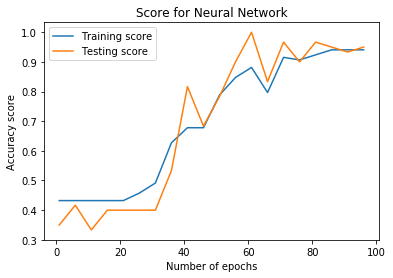

Time in 45.215726s


In [12]:
start = time.time()

training_score = []
testing_score = []
nb_epochs = range(1,100,5)
for k in nb_epochs:
    model = Sequential()
    model.add(Dense(16, activation='tanh', input_dim=13))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_dummies2, epochs=k, batch_size=10)
    #y_pred_train = model.predict(X_train)
    #y_pred_test = model.predict(X_test)
    #print'Training score for Neural Network : ', accuracy_score(y_pred_train, y_train)
    #print'Testing score for Neural Network : ', accuracy_score(y_pred_test, y_test)
    scores = model.evaluate(X_train, y_dummies2)
    training_score.append(scores[1])
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    predictions = model.predict(X_test)

    y_pred_test = []
    for i in range(len(predictions)):
        y_pred_test.append(np.argmax(predictions[i])+1)
    testing_score.append(accuracy_score(y_pred_test, y_test))
    print'Testing score for Neural Network : ', accuracy_score(y_pred_test, y_test)
plt.figure()
plt.plot(nb_epochs, training_score, label='Training score')
plt.plot(nb_epochs, testing_score, label='Testing score')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy score')
plt.title('Score for Neural Network')
plt.savefig('Neural_Network.png')
plt.show()
print'Time in %fs' % (time.time() - start)

In [ ]:
print(training_score)
print(len(testing_score))
new_train = training_score
new_test = testing_score
new_epo = nb_epochs

In [ ]:
del new_train[21]
del new_test[21]
del new_epo[21]

In [ ]:
del new_train[56]
del new_test[56]
del new_epo[56]

In [ ]:
plt.figure()
plt.plot(new_epo, new_train, label='Training score')
plt.plot(new_epo, new_test, label='Testing score')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Score for Neural Network')
plt.savefig('bite.png')
plt.show()